In [9]:
from PIL import Image
import glob
import numpy as np
import os#for creating/emptying folders
import re
import sys
from PIL import Image
import matplotlib.pyplot as plt

#disk_path = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
disk_path = 'F:/server_output/'
has_processed = True#Working on Processed data or Unprocessed data
version_name= 'v13.0_processed'
stem_filenames=['m_3_is_stem_mat2_0.jpg','m_3_is_stem_mat2_last.jpg','m_3_stem_and_img_0.jpg','m_3_stem_and_img_last.jpg']
stem_filenames_title=['1st img','last img','1st img','last img']


def check_foldername(foldernames,test_string):
    has_test_string = np.zeros((len(foldernames),len(test_string)))
    for f_i,foldername in enumerate(foldernames):
        for s_i,string in enumerate(test_string):
            if string in foldername.lower():
                has_test_string[f_i,s_i] = 1
    #remove foldernames that doesn't contain any element of test_string
    keep_vec = np.sum(has_test_string,1)
    if np.where(keep_vec>0)[0].size < len(foldernames):
        print(f'ignore {len(foldernames)-np.where(keep_vec>0)[0].size} folder')
    foldernames_new = [foldernames[i] for i in np.where(keep_vec>0)[0]]#only keep the folder names with "stem" or "leaf"
    has_test_string_new = np.asarray([has_test_string[i,] for i in np.where(keep_vec>0)[0]])
    return foldernames_new,has_test_string_new

def clean_folder_name(all_folders_name,has_stem_leaf,stem_leaf_list):
    '''
    input: ['Alclat2_stem.DONEGOOD.HANNAH.9.26', 'casarb2.2_stem.HANNAHDONEGOD.11.4', 'casarb5_stem.DONEGOOD.HANNAH.11.7'...]
    output: ['Alclat2_stem', 'casarb2.2_stem', 'casarb5_stem',...]
    '''
    all_folders_name_short=all_folders_name.copy()
    for i, foldername in enumerate(all_folders_name):
        terminate_word = stem_leaf_list[int(np.where(has_stem_leaf[i]>0)[0])]#stem or leaf
        stop_index = foldername.lower().find(terminate_word)
        all_folders_name_short[i] = foldername[:(stop_index+len(terminate_word))]
    return all_folders_name_short


### Plot stem extraction images for 1st and last img in each folder

version_name v13.0_processed ...
['Alclat2_stem', 'casarb2.2_stem', 'casarb5_stem', 'drygla5_stem', 'inglau3_stem', 'inglau4_stem', 'inglau5_stem']


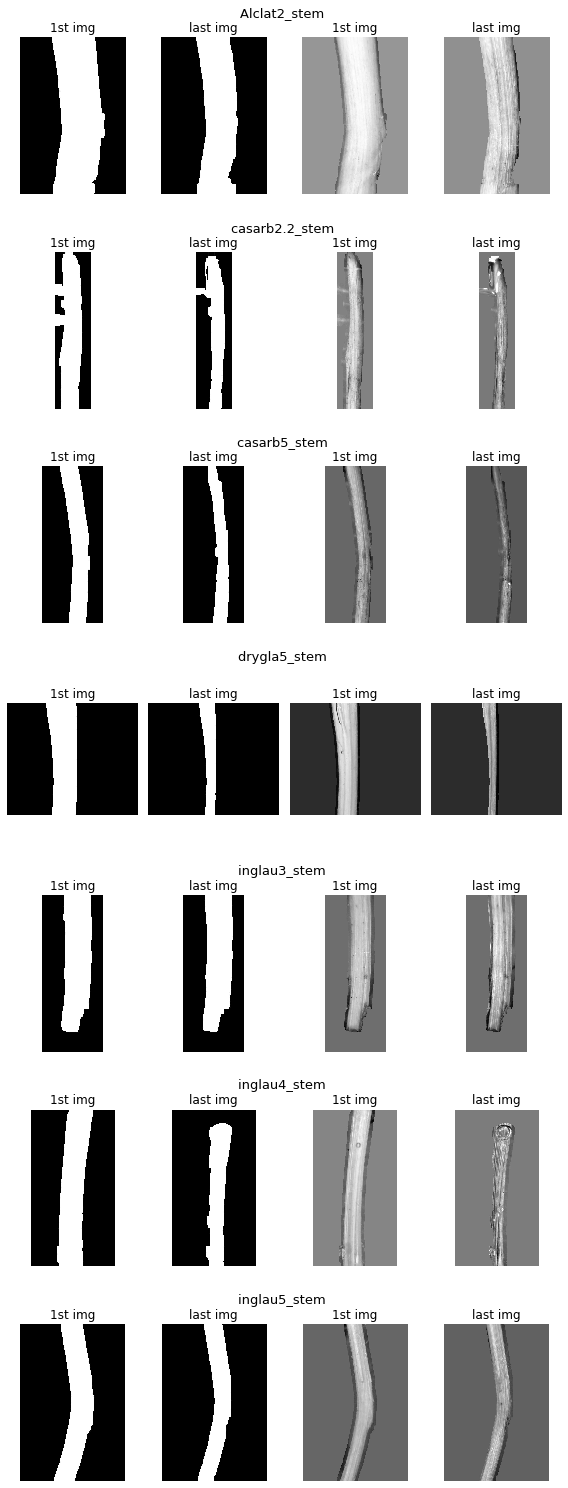

In [10]:
print(f'version_name {version_name} ...')
if has_processed==True:
    version_dir = os.path.join(disk_path,"processed",version_name)
else:
    version_dir = os.path.join(disk_path,"unprocessed",version_name)
all_folders_name = sorted(os.listdir(version_dir))
#print(f'{all_folders_name}')
#only keep the folder names with "stem" or "leaf" (i.e. ignore folders like "output")
stem_list = ["stem"]
all_folders_name,has_stem = check_foldername(all_folders_name,stem_list)
#print(f'{has_stem_leaf}')#len(all_folders_name) x 2: each entry is {0 or 1}. 1st col "stem", 2nd col "leaf"
all_folders_name_short = clean_folder_name(all_folders_name,has_stem,stem_list)
print(f'{all_folders_name_short}')

all_folders_dir = [os.path.join(version_dir,folder) for folder in all_folders_name]
all_folders_dir_result = [os.path.join(folder_dir, os.listdir(folder_dir)[0]) for folder_dir in all_folders_dir]
#print(f'{all_folders_dir_processed}')

ncols = len(stem_filenames)
nrows=len(all_folders_dir_result)

fig, big_axes = plt.subplots( figsize=(2*ncols, 3*nrows) , nrows=nrows, ncols=1, sharey=True) 

for row, big_ax in enumerate(big_axes, start=1):
    big_ax.set_title("%s \n" % all_folders_name_short[row-1], fontsize=13)
    big_ax.axis("off")
    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    #big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False



#fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(9, 13))
plot_i=1
for p_i, processed_path in enumerate(all_folders_dir_result):
    #folder_name = all_folders_name[p_i]
    #print(f'{all_folders_name_short[p_i]}')
    for f_i in range(len(stem_filenames)):
        img = Image.open(os.path.join(processed_path,stem_filenames[f_i]))
        ax = fig.add_subplot(nrows,ncols,plot_i)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(stem_filenames_title[f_i])
        plot_i +=1
        #ax[p_i,f_i].imshow(img)
        #ax[p_i,f_i].set_title(stem_filenames_title[f_i])
plt.tight_layout()
plt.show()      